In [37]:
# import pandas as pd
# import numpy as np
# from scipy.optimize import linprog
import random
import matplotlib.pyplot as plt
import math


## Initial optimization

In [38]:
# Define the cutting mode

cut_patterns = {
    "Pattern 1": [1250, 1250, 3000, 5000],
    "Pattern 2": [1250, 1250, 3000, 3000, 2000],
    "Pattern 3": [2500, 2500, 2500],
    "Pattern 4": [3500, 2500, 5000],
    "Pattern 5": [7500, 3500, 5000],
    "Pattern 6": [7500, 3500, 3000, 1000, 1000]
}

In [39]:
# Function to simulate the cutting process
def simulate_cutting(order):
    table = {}  # Current pieces on the table
    max_table_length = 0  # Required maximal table length
    
    for pattern_name in order:
        pattern = cut_patterns[pattern_name]
        for length in pattern:
            table[length] = table.get(length, 0) + 1  # Place the pieces on the table
        
        # Calculate the current table length
        table_length = sum(length * count for length, count in table.items())
        max_table_length = max(max_table_length, table_length)
        
        # Check for completed bundles that can be removed
        for length, count in table.items():
            if count == sum(cut_patterns[pattern_name].count(length) for pattern_name in order):
                table[length] = 0  # Remove completed bundles
    
    return max_table_length

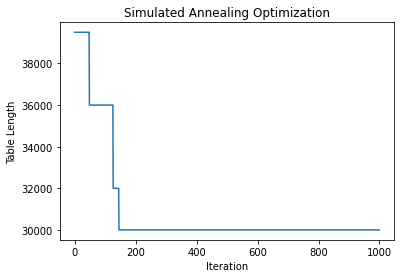

Optimal Order: ['Pattern 6', 'Pattern 5', 'Pattern 4', 'Pattern 1', 'Pattern 3', 'Pattern 2']
Minimal Table Length: 30000 mm


In [40]:
# Simulated Annealing Algorithm

def simulated_annealing(init_temp, cooling_rate, iterations = 1000):
    current_order = list(cut_patterns.keys())  # Start with some order
    current_length = simulate_cutting(current_order)
    best_order = current_order
    best_length = current_length
    temp = init_temp
    lengths = []  # To store lengths for visualization
    
    # Number of iterations (the more iterations, the better chance of finding a good solution)
    for i in range(iterations):
        # Generate a neighboring solution by swapping two random patterns
        neighbor_order = current_order[:]
        a, b = random.sample(range(len(neighbor_order)), 2)
        neighbor_order[a], neighbor_order[b] = neighbor_order[b], neighbor_order[a]
        neighbor_length = simulate_cutting(neighbor_order)
        
        # Acceptance criteria
        if neighbor_length < current_length or random.random() < math.exp((current_length - neighbor_length) / temp):
            current_order, current_length = neighbor_order, neighbor_length
            if neighbor_length < best_length:
                best_order, best_length = neighbor_order, neighbor_length
        
        # Cooling
        temp *= cooling_rate
        lengths.append(best_length)  # Store the best length for visualization

    # Visualization
    plt.plot(lengths)
    plt.ylabel('Table Length')
    plt.xlabel('Iteration')
    plt.title('Simulated Annealing Optimization')
    plt.savefig('plot1.pdf')
    plt.show()

    return best_order, best_length

# Run Simulated Annealing
optimal_order, minimal_length = simulated_annealing(init_temp=1000, cooling_rate=0.995)
print(f"Optimal Order: {optimal_order}")
print(f"Minimal Table Length: {minimal_length} mm")




## Extended Scenario Optimization

In [44]:
# Given string of cutting patterns
patterns_string = """
5867-5867-5867
5767-3331-3331-2172-3331
3331-5767-2172-2172-2172-2172 8992-3331-3331-2172 8992-8992-16 5767-5767-5767-699 5767-5767-5767-699 5767-5767-5767-699 8992-2337-1892-1892-1419-1419 8992-8992-16
8992-8992-16
8992-3035-2070-3035 3035-2337-2070-2070-2070-2070-1419-1419-1419 5867-5867-5867-399
5867-5867-5867-399
6350-6350-5300
6350-6350-5300
8992-8992-16 2070-2070-2070-2070-2070-2070-1419-1419-1419-1323 8992-8992-16
5867-5867-5867-399
5867-5867-5867-399
5867-5867-5867-399
6350-6350-4829-471
6350-6350-4829-471
8992-8992-16
"""

# Split the string into individual pattern strings
pattern_strings = patterns_string.split()

# Convert each pattern string into a list of integers
cut_patterns = [list(map(int, pattern_string.split('-'))) for pattern_string in pattern_strings]

# Example usage:
order = list(range(len(cut_patterns)))  # Example order: [0, 1, 2, ...]


In [45]:
def simulate_cutting(order):
    table = {}  # Dictionary to hold the number of pieces of each length on the table
    max_length = 0  # Variable to hold the maximum table length encountered

    # Iterate through the cut patterns in the specified order
    for pattern_index in order:
        pattern = cut_patterns[pattern_index]  # Get the current cut pattern
        
        # Perform the cuts and update the table
        for length in pattern:
            table[length] = table.get(length, 0) + 1  # Increment the count of pieces of this length on the table
        
        # Calculate the current table length
        current_length = sum(length * count for length, count in table.items())
        
        # Update the maximum table length if necessary
        max_length = max(max_length, current_length)
        
        # Check for complete bundles and remove them from the table
        for length, count in list(table.items()):  # Use list() to avoid modifying the dictionary while iterating
            bundle_complete = True  # Assume bundle is complete
            for pattern in cut_patterns:
                if pattern.count(length) > count:
                    bundle_complete = False  # If any pattern requires more pieces of this length, bundle is not complete
                    break
            if bundle_complete:
                del table[length]  # Remove this length from the table

    return max_length


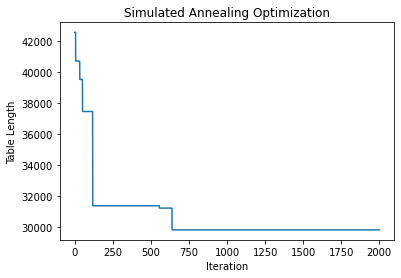

Optimal Order: [8, 19, 12, 21, 13, 0, 5, 20, 18, 11, 24, 9, 16, 1, 7, 15, 10, 4, 6, 17, 22, 23, 14, 25, 2, 3]
Minimal Table Length: 29830 mm


In [46]:
# Simulated Annealing Algorithm

def simulated_annealing(init_temp, cooling_rate, iterations = 1000):
    current_order = list(range(len(cut_patterns)))  # Start with some order
    current_length = simulate_cutting(current_order)
    best_order = current_order
    best_length = current_length
    temp = init_temp
    lengths = []  # To store lengths for visualization

    for i in range(iterations):
        # Generate a neighboring solution by swapping two random patterns
        neighbor_order = current_order[:]
        a, b = random.sample(range(len(neighbor_order)), 2)
        neighbor_order[a], neighbor_order[b] = neighbor_order[b], neighbor_order[a]
        neighbor_length = simulate_cutting(neighbor_order)
        
        # Acceptance criteria
        if neighbor_length < current_length or random.random() < math.exp((current_length - neighbor_length) / temp):
            current_order, current_length = neighbor_order, neighbor_length
            if neighbor_length < best_length:
                best_order, best_length = neighbor_order, neighbor_length
        
        # Cooling
        temp *= cooling_rate
        lengths.append(best_length)  # Store the best length for visualization

    # Visualization
    plt.plot(lengths)
    plt.ylabel('Table Length')
    plt.xlabel('Iteration')
    plt.title('Simulated Annealing Optimization')
    plt.savefig('plot2.pdf')
    plt.show()

    return best_order, best_length

# Run Simulated Annealing
optimal_order, minimal_length = simulated_annealing(init_temp=1000, cooling_rate=0.995, iterations = 2000)
print(f"Optimal Order: {optimal_order}")
print(f"Minimal Table Length: {minimal_length} mm")
